# Import

In [1]:
import numpy as np
import pandas as pd
import nlplot
import plotly
from plotly.subplots import make_subplots

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)
pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_colwidth', 5000)

/Users/takapy/.pyenv/versions/3.7.2/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# data load

In [2]:
df = pd.read_csv('sample_twitter.csv')

In [3]:
display(df.head(3), df.tail(3), df.shape)

searched_for                                 hashtags
0  #データサイエンティスト  筋トレ 今日の積み上げ 駆け出しエンジニアと繋がりたい データサイエンティスト
1  #データサイエンティスト      統計学 人工知能 ダイヤモンド データサイエンティスト プログラミング
2  #データサイエンティスト            データマイニング データサイエンス データサイエンティスト

searched_for                   hashtags
2710      #kaggle  featureengineering kaggle
2711      #kaggle   superintelligence kaggle
2712      #kaggle             titanic kaggle

(2713, 2)

# use nlplot

In [4]:
# 全データ・#データサイエンティスト・#kaggleをそれぞれインスタンス化
npt = nlplot.NLPlot(df, target_col='hashtags')
npt_ds = nlplot.NLPlot(df.query('searched_for == "#データサイエンティスト"'), target_col='hashtags')
npt_kaggle = nlplot.NLPlot(df.query('searched_for == "#kaggle"'), target_col='hashtags')

## ストップワードの計算

In [5]:
# top_nで頻出上位単語, min_freqで頻出下位単語を指定できる
# 今回は上位2単語（データサイエンティスト・kaggle）をストップワードに指定
stopwords = npt.get_stopword(top_n=2, min_freq=0)

In [6]:
stopwords

['データサイエンティスト', 'kaggle']

## n-grams

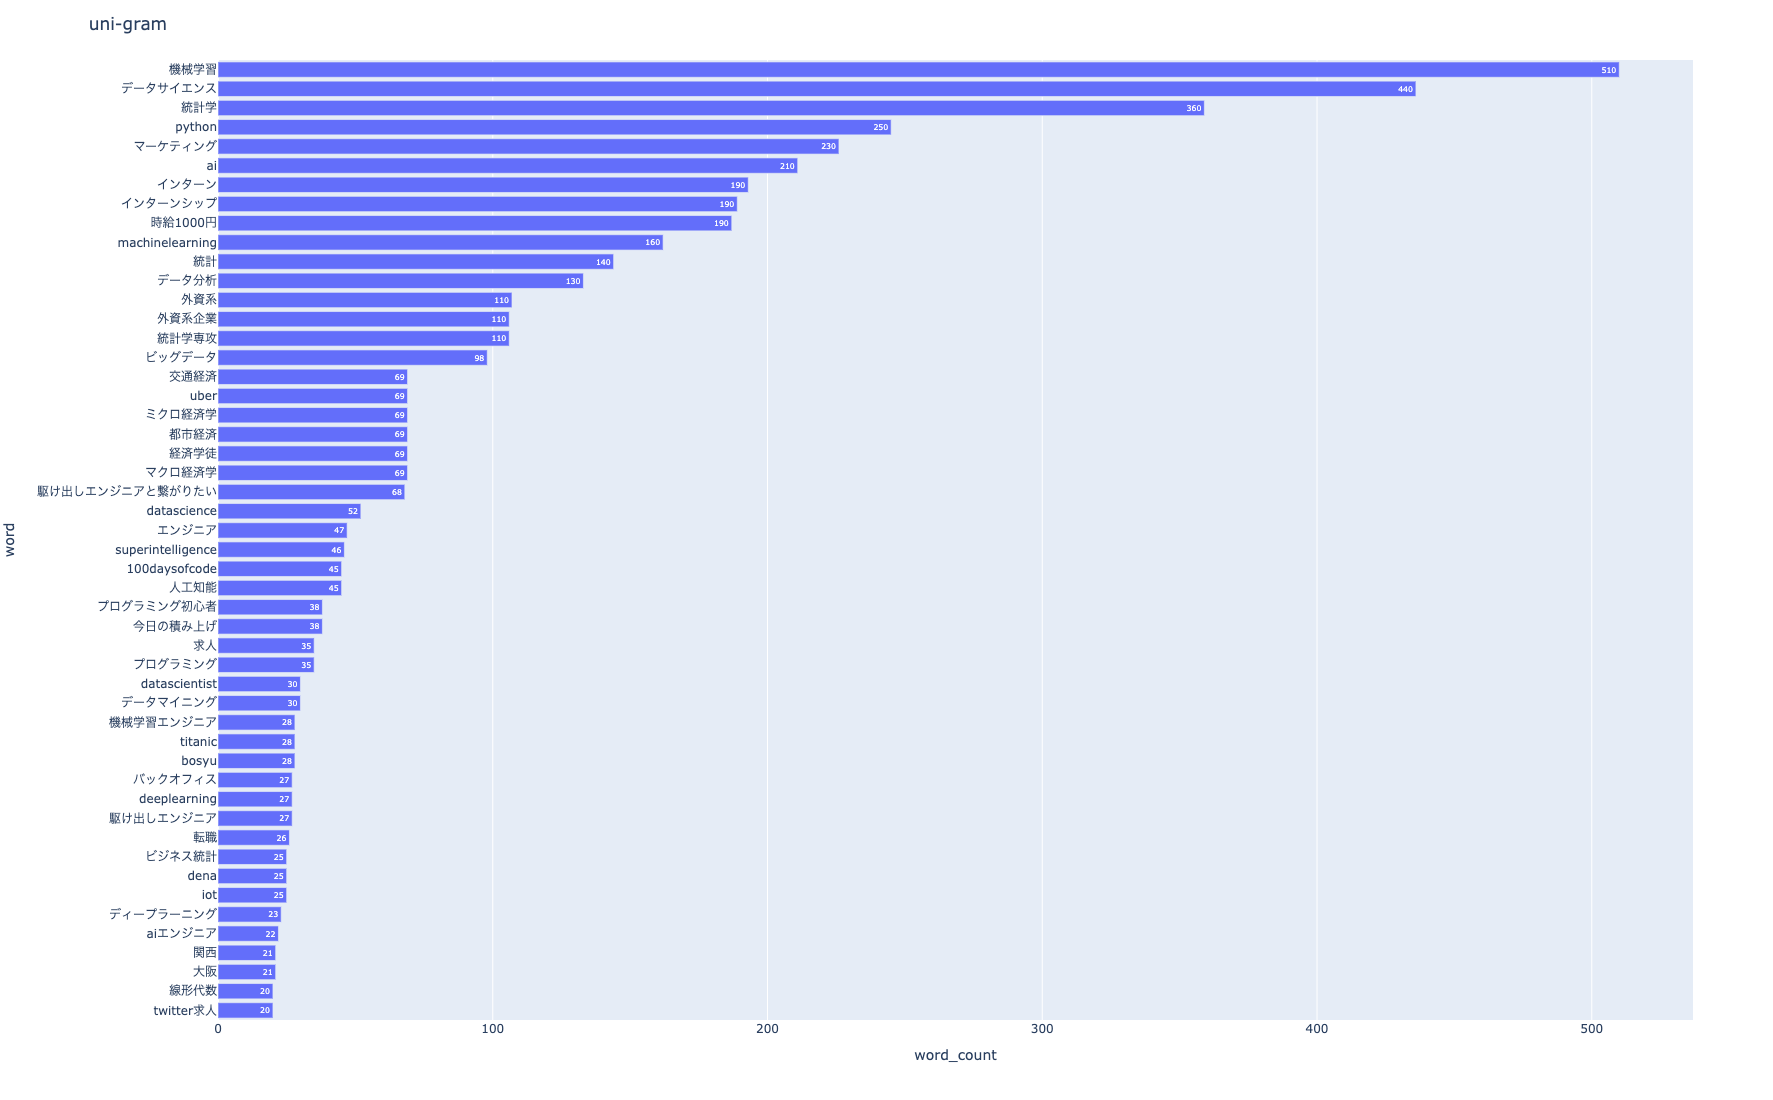

In [7]:
npt.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=50,
    width=800,
    height=1100,
    color=None,
    horizon=True,
    stopwords=stopwords,
    verbose=False,
    save=False,
)

100%|██████████| 2713/2713 [00:00<00:00, 194425.59it/s]


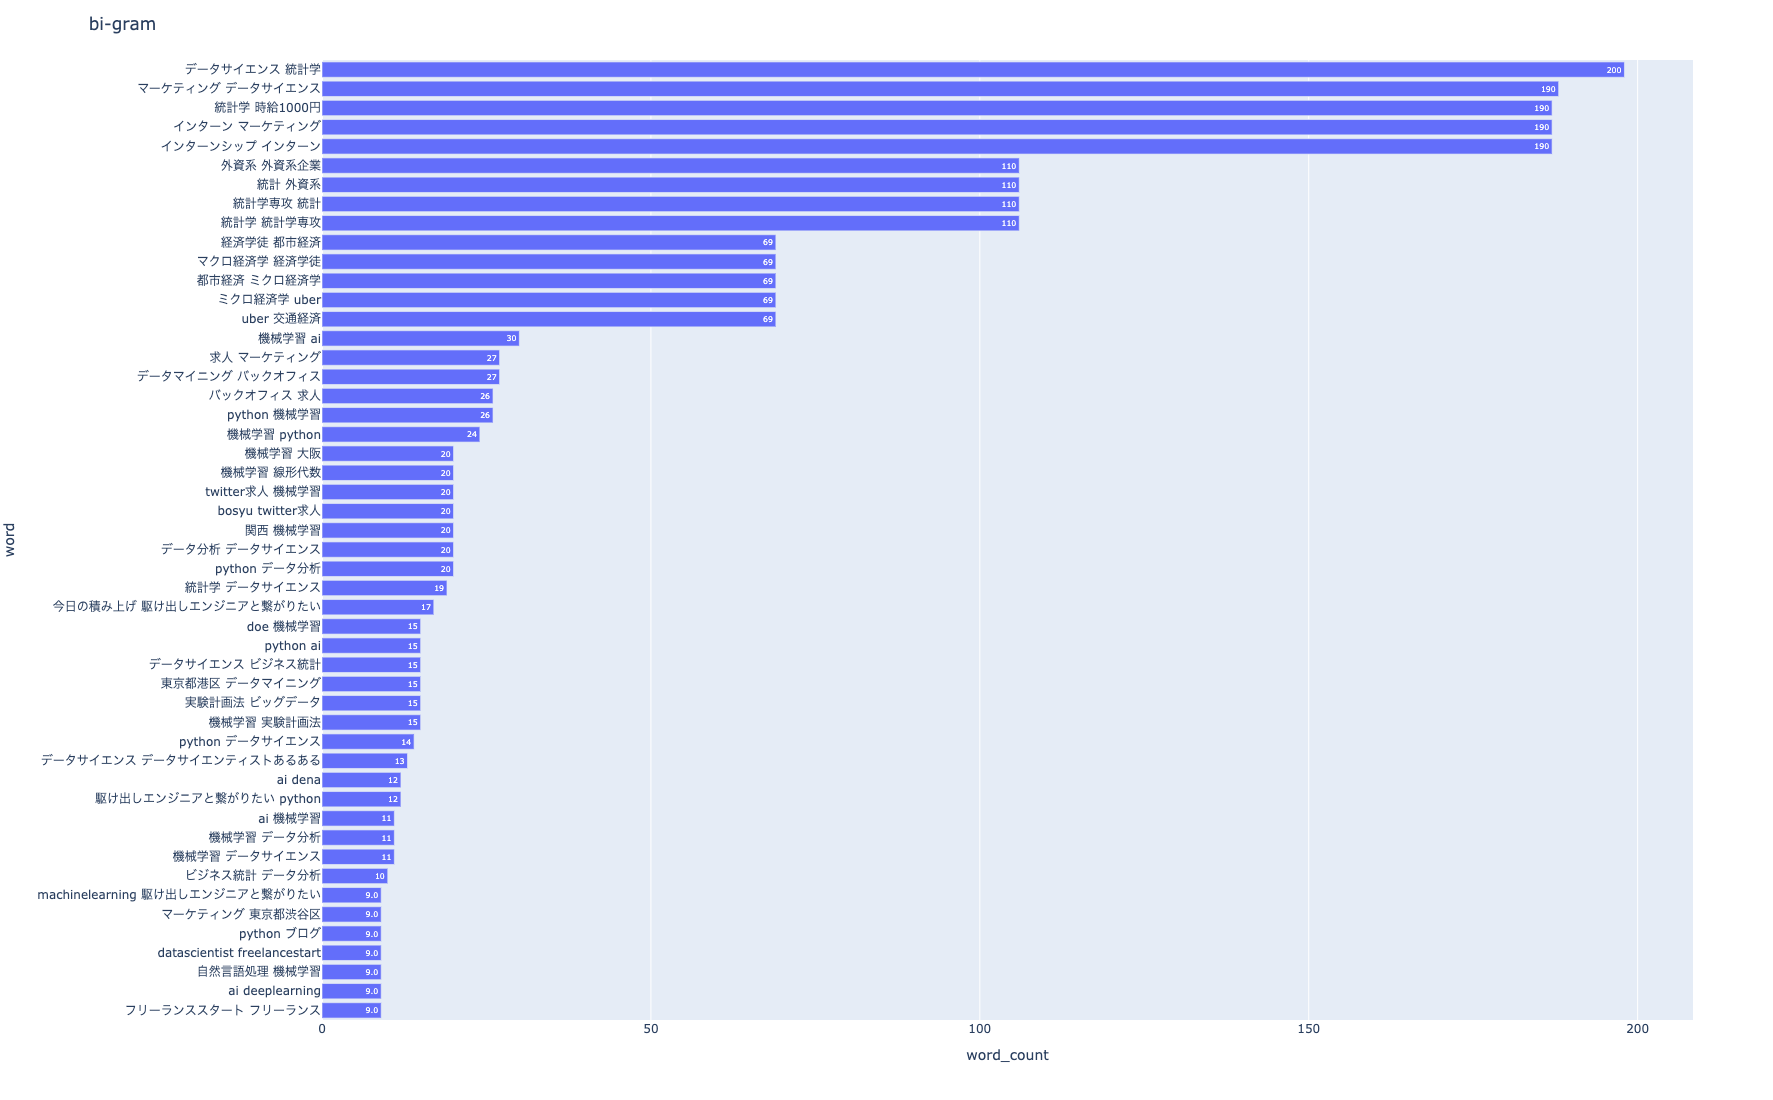

In [8]:
npt.bar_ngram(
    title='bi-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=2,
    top_n=50,
    width=800,
    height=1100,
    color=None,
    horizon=True,
    stopwords=stopwords,
    verbose=True,
    save=False,
)

100%|██████████| 2713/2713 [00:00<00:00, 196925.56it/s]


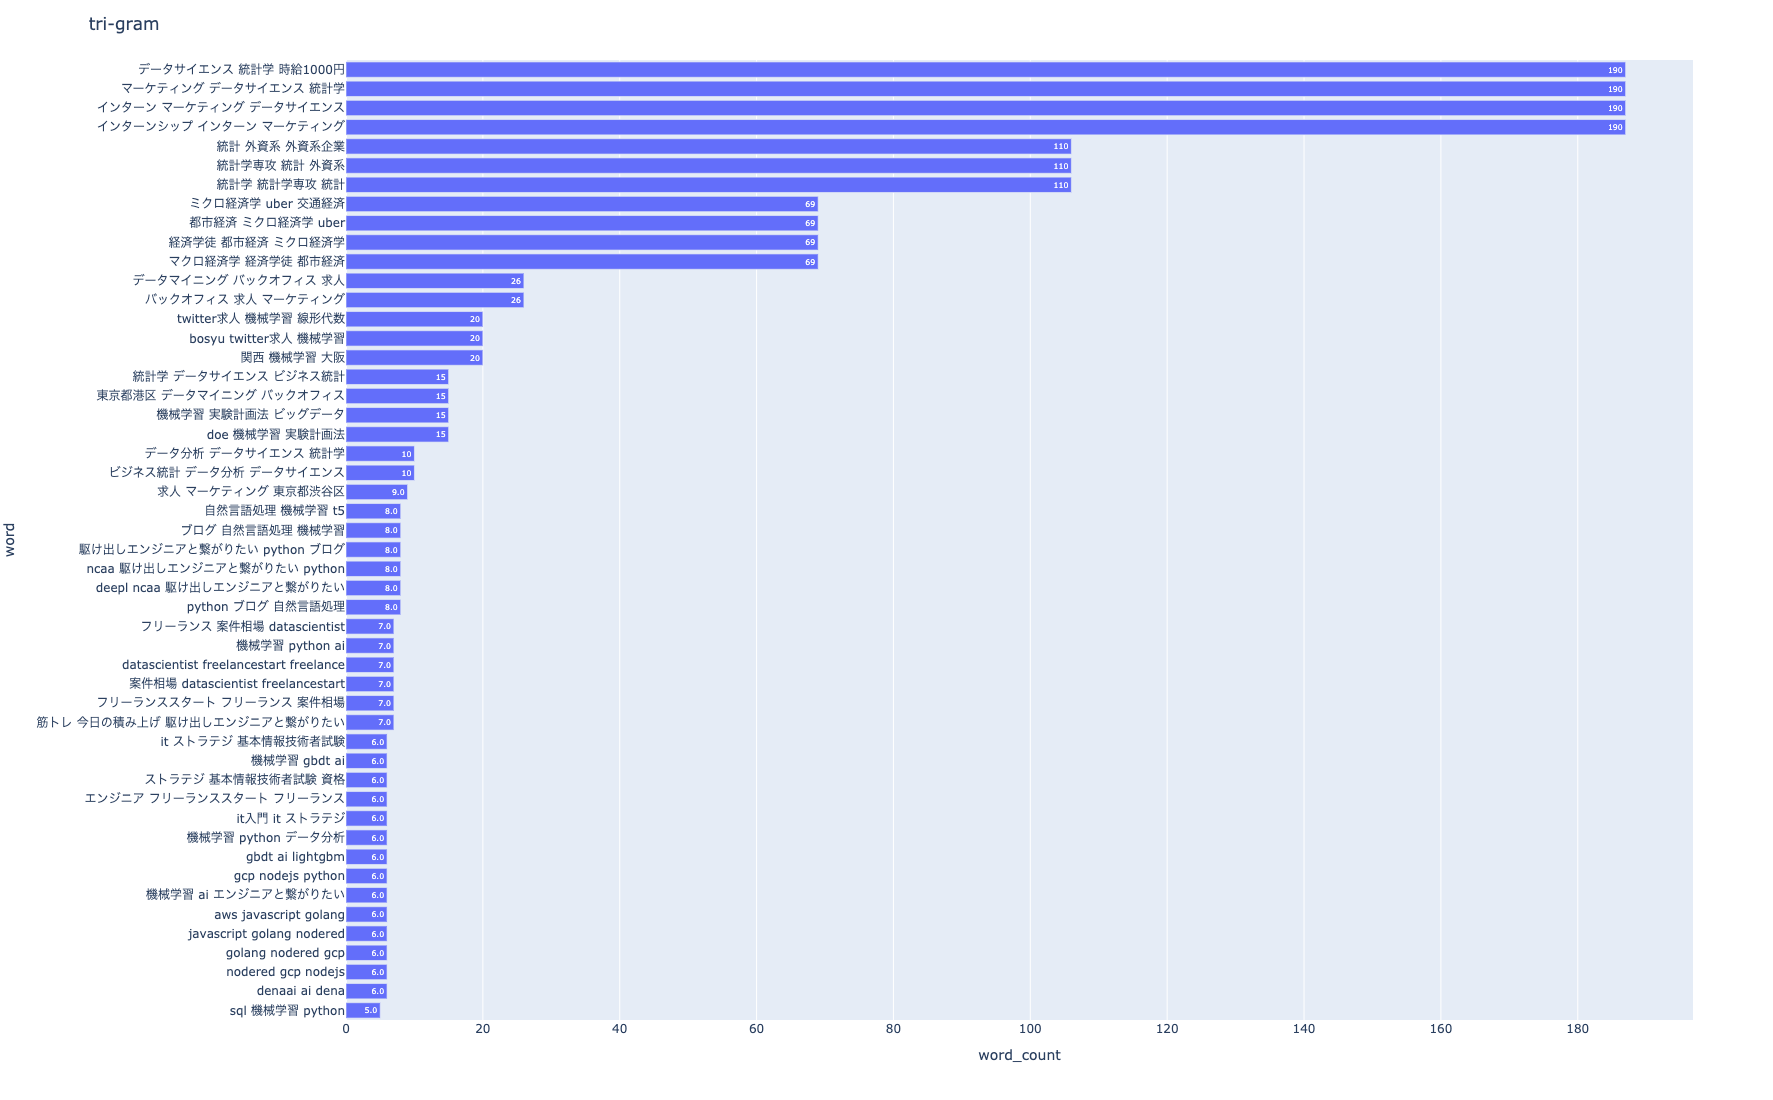

In [9]:
npt.bar_ngram(
    title='tri-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=3,
    top_n=50,
    width=1000,
    height=1100,
    color=None,
    horizon=True,
    stopwords=stopwords,
    verbose=True,
    save=False,
)

## ラベルごとに比較する

- 実際のデータ分析の場では、データの切り口を変えながら可視化したい場合がある。その場合は下記のように同時にプロットすることもできる

In [10]:
# #データサイエンティストのfigを取得
fig_unigram_ds = npt_ds.bar_ngram(
    stopwords=stopwords,
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=50,
    width=600,
    height=1100,
    color=None,
    horizon=True,
    verbose=True,
    save=False,
)

# #kaggleのfigを取得
fig_unigram_kaggle = npt_kaggle.bar_ngram(
    stopwords=stopwords,
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=50,
    width=600,
    height=1100,
    color=None,
    horizon=True,
    verbose=True,
    save=False,
)

100%|██████████| 1224/1224 [00:00<00:00, 195120.98it/s]


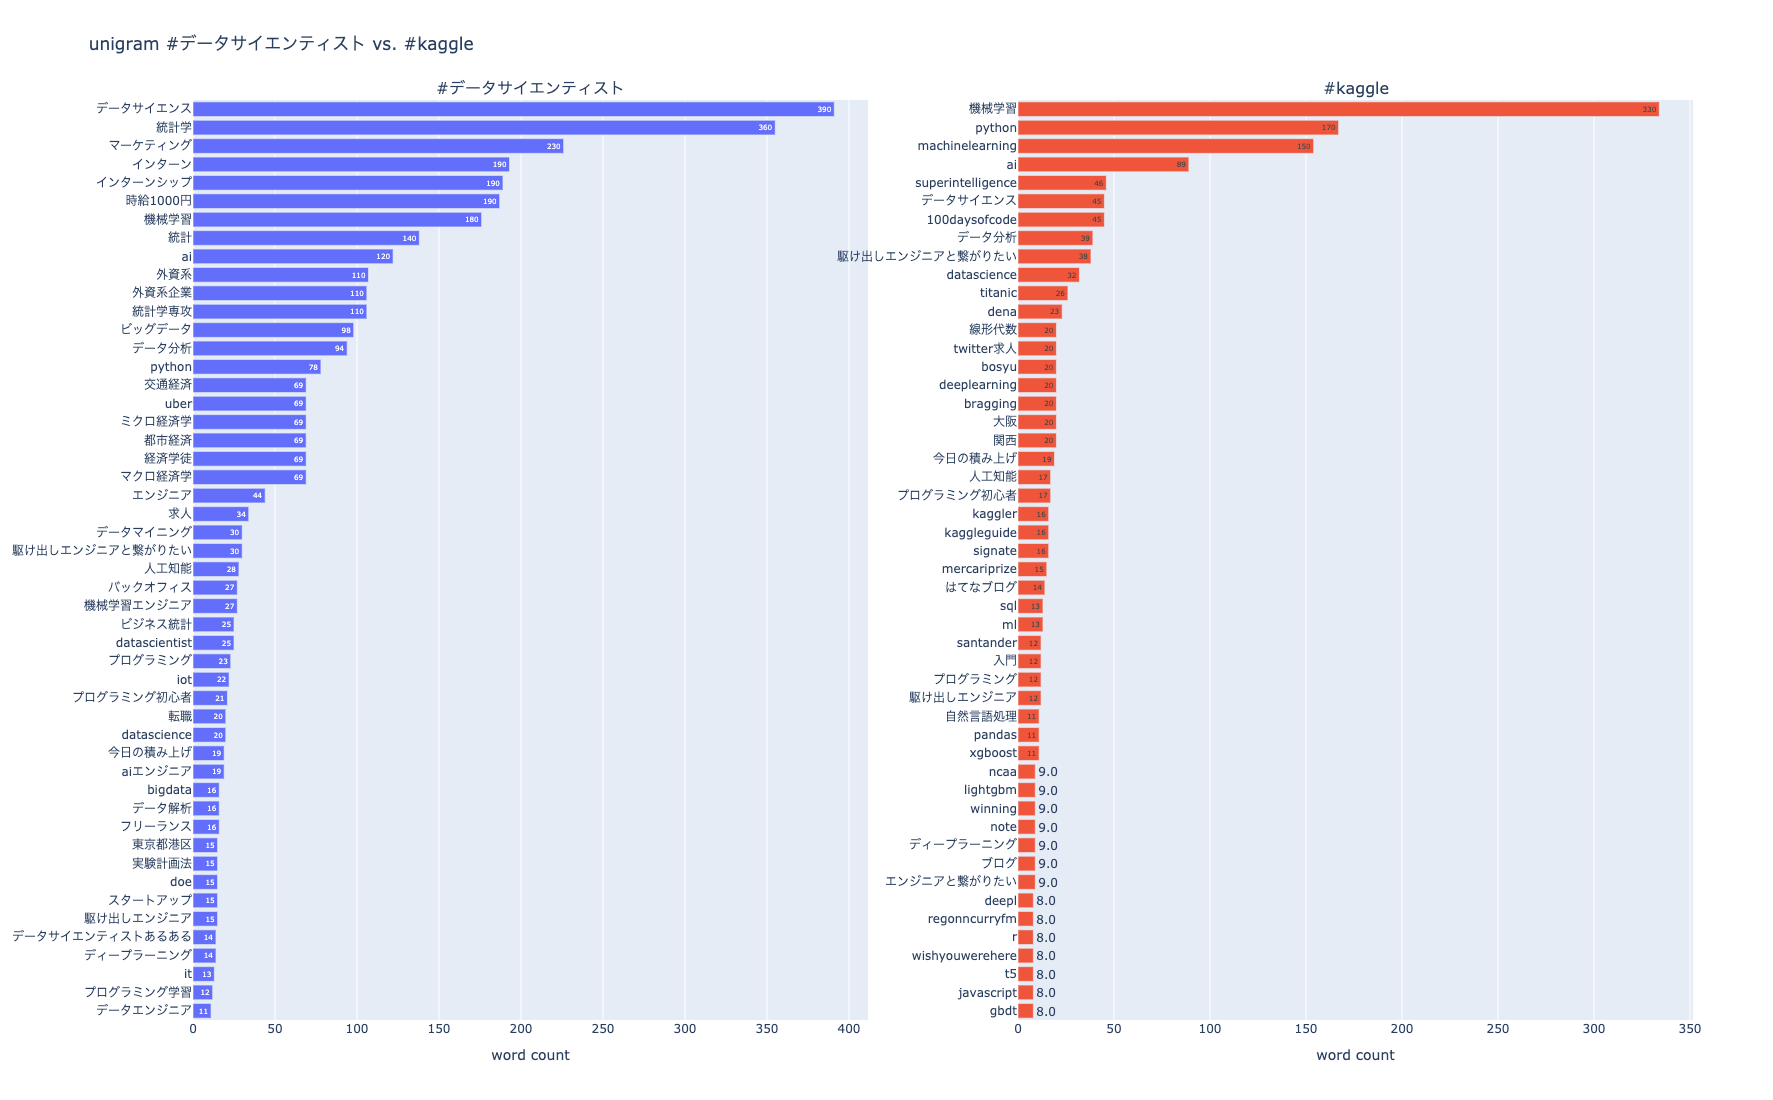

In [11]:
# subplot
trace1 = fig_unigram_ds['data'][0]
trace2 = fig_unigram_kaggle['data'][0]

fig = make_subplots(rows=1, cols=2, subplot_titles=('#データサイエンティスト', '#kaggle'), shared_xaxes=False)
fig.update_xaxes(title_text='word count', row=1, col=1)
fig.update_xaxes(title_text='word count', row=1, col=2)

fig.update_layout(height=1100, width=1900, title_text='unigram #データサイエンティスト vs. #kaggle')
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)

plotly.offline.plot(fig, filename='unigram #データサイエンティストvs#kaggle.html', auto_open=False)

fig.show()

## 単語出現頻度の分布

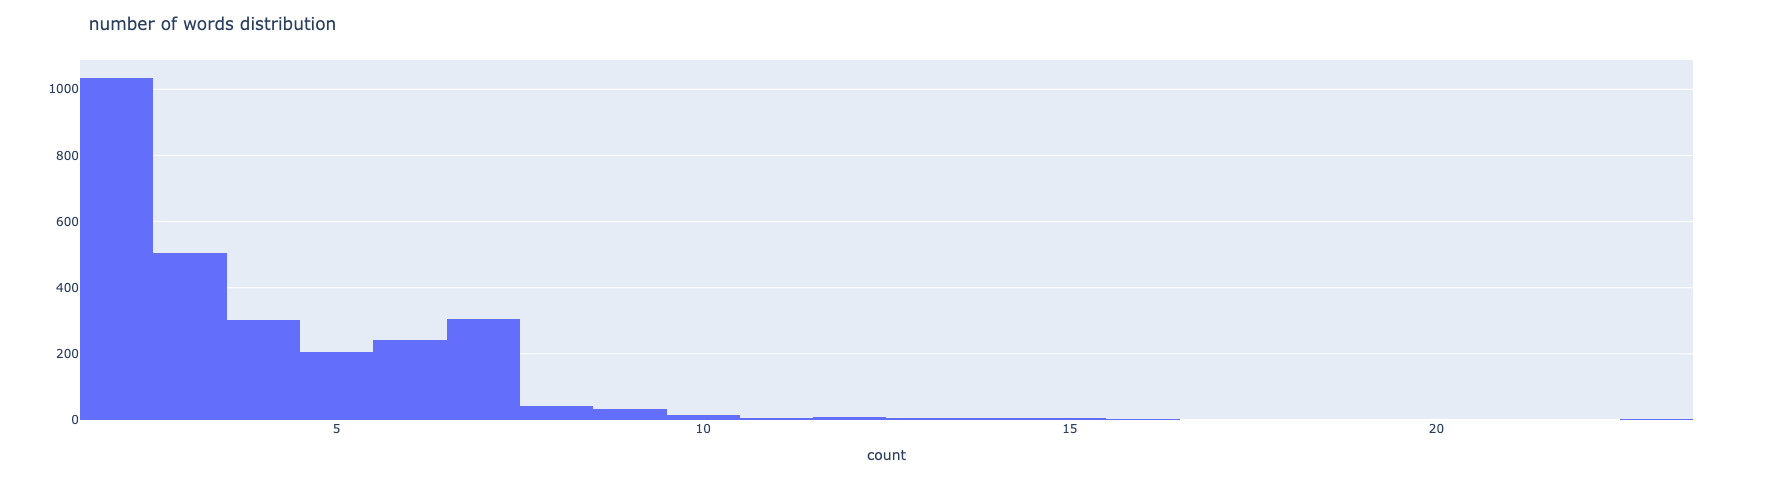

In [12]:
# 単語数の分布
npt.word_distribution(
    title='number of words distribution',
    xaxis_label='count',
    yaxis_label='',
    width=1000,
    height=500,
    color=None,
    template='plotly',
    bins=None,
    save=False,
)

## ラベル毎

In [13]:
fig_wd_ds = npt_ds.word_distribution(
    title='number of words distribution',
    xaxis_label='length',
    yaxis_label='',
    width=1000,
    height=500,
    color=None,
    template='plotly',
    bins=None,
    save=False,
)

fig_wd_kaggle = npt_kaggle.word_distribution(
    title='number of words distribution',
    xaxis_label='length',
    yaxis_label='',
    width=1000,
    height=500,
    color=None,
    template='plotly',
    bins=None,
    save=False,
)

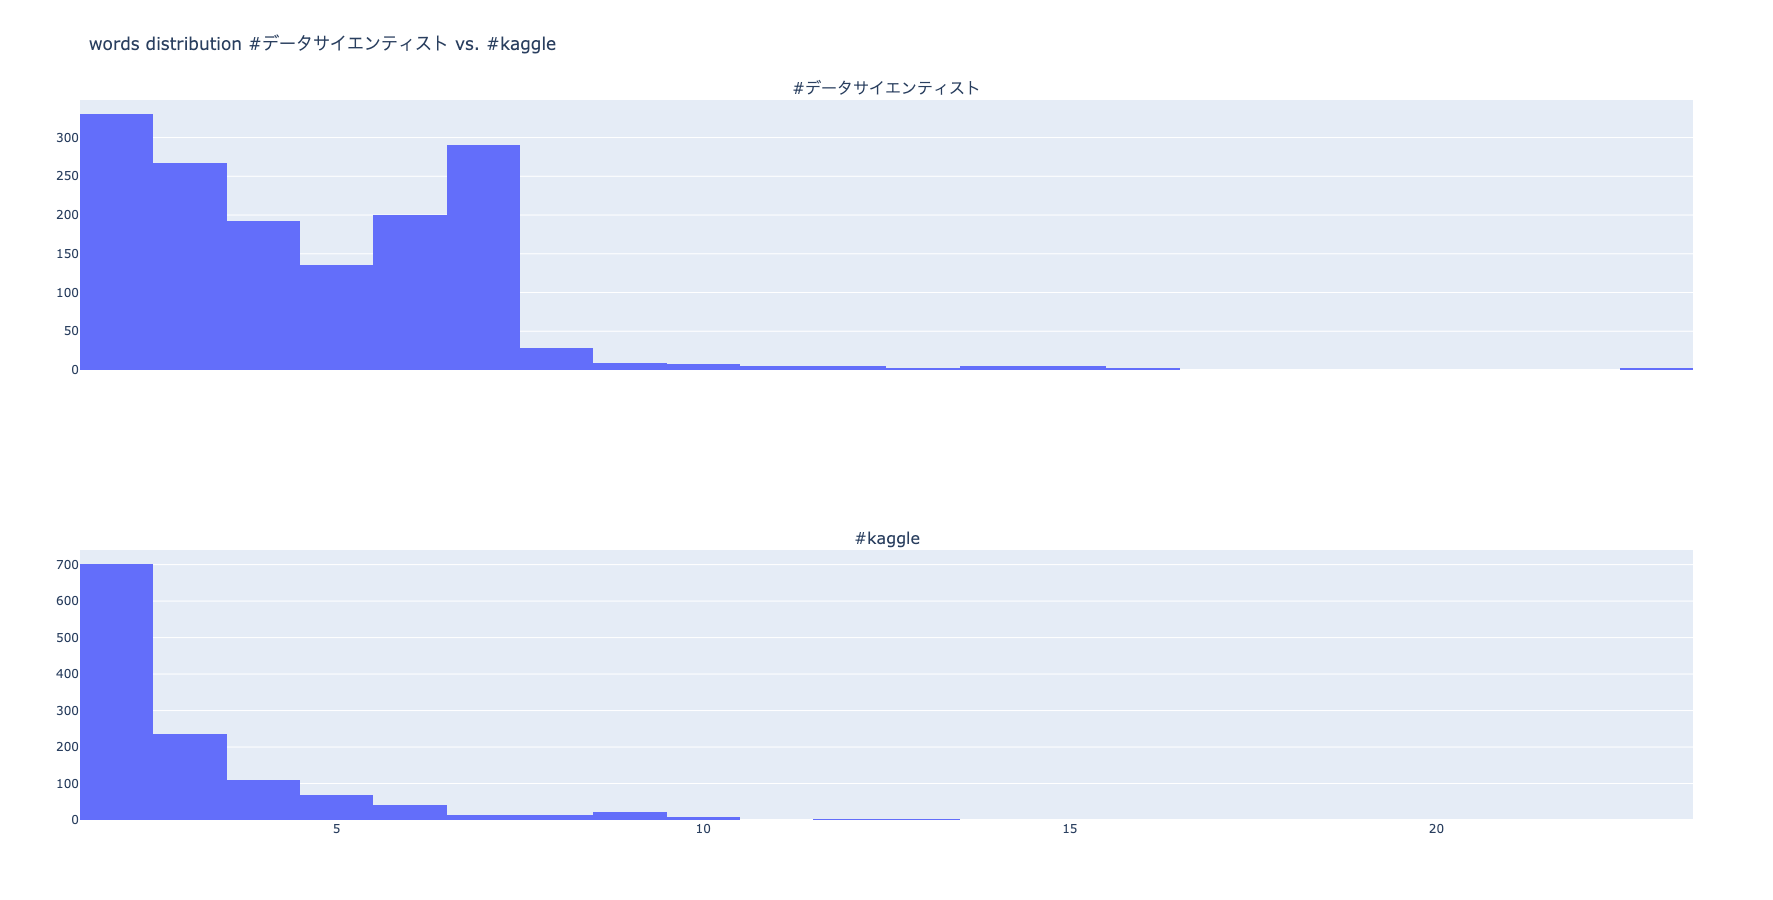

In [14]:
trace1 = fig_wd_ds['data'][0]
trace2 = fig_wd_kaggle['data'][0]

fig = make_subplots(rows=2, cols=1, subplot_titles=('#データサイエンティスト', '#kaggle'), shared_xaxes=True)

fig.update_layout(height=900, width=1200, title_text='words distribution #データサイエンティスト vs. #kaggle')
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=2, col=1)

plotly.offline.plot(fig, filename='words distribution #データサイエンティストvs#kaggle.html', auto_open=False)

fig.show()

## tree map

100%|██████████| 2713/2713 [00:00<00:00, 176306.08it/s]


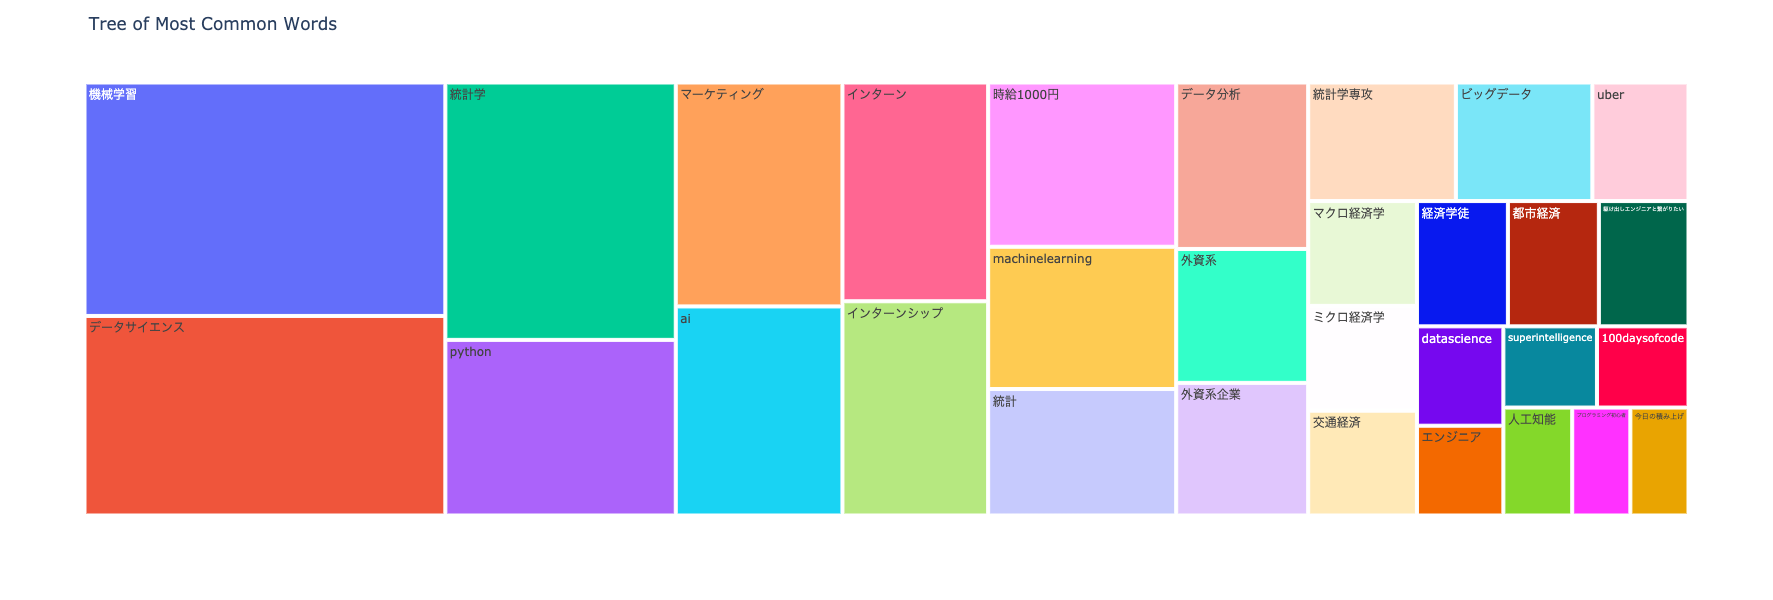

In [15]:
npt.treemap(
    stopwords=stopwords,
    title='Tree of Most Common Words',
    ngram=1,
    top_n=30,
    width=1300,
    height=600,
    verbose=True,
    save=False
)

## word cloud

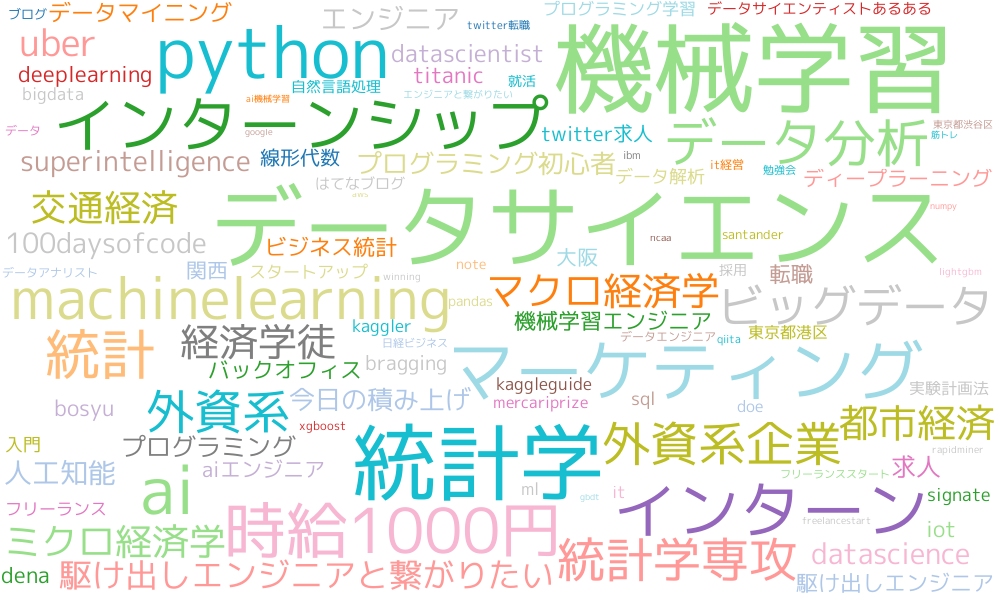

In [16]:
npt.wordcloud(
    stopwords=stopwords,
    width=1000,
    height=600,
    max_words=100,
    max_font_size=100,
    colormap='tab20_r',
    mask_file=None,
    save=True
)

## 共起ネットワーク

In [17]:
npt.build_graph(stopwords=stopwords, min_edge_frequency=11)
npt_ds.build_graph(stopwords=stopwords, min_edge_frequency=7)
npt_kaggle.build_graph(stopwords=stopwords, min_edge_frequency=5)

node_size:48, edge_size:96
node_size:47, edge_size:100
node_size:42, edge_size:105


In [18]:
# ネットワークの元となるデータフレーム 
display(
    npt.node_df.head(), npt.node_df.shape,
    npt.edge_df.head(), npt.edge_df.shape
)

id  id_code  adjacency_frequency  betweeness_centrality  \
0            統計学専攻        0                    4                  0.000   
1            東京都港区        1                    4                  0.000   
2           ビッグデータ        2                    3                  0.000   
3      datascience        3                    1                  0.000   
4  machinelearning        4                    3                  0.035   

   clustering_coefficient  community  
0                   1.000          1  
1                   1.000          4  
2                   1.000          0  
3                   0.000          0  
4                   0.333          0

(48, 6)

source    target  edge_frequency  source_code  target_code
0  データサイエンス       統計学             225           21           45
1     インターン  データサイエンス             188           41           21
2   マーケティング       統計学             188           34           45
3  データサイエンス   マーケティング             188           21           34
4   マーケティング   時給1000円             187           34           32

(96, 5)

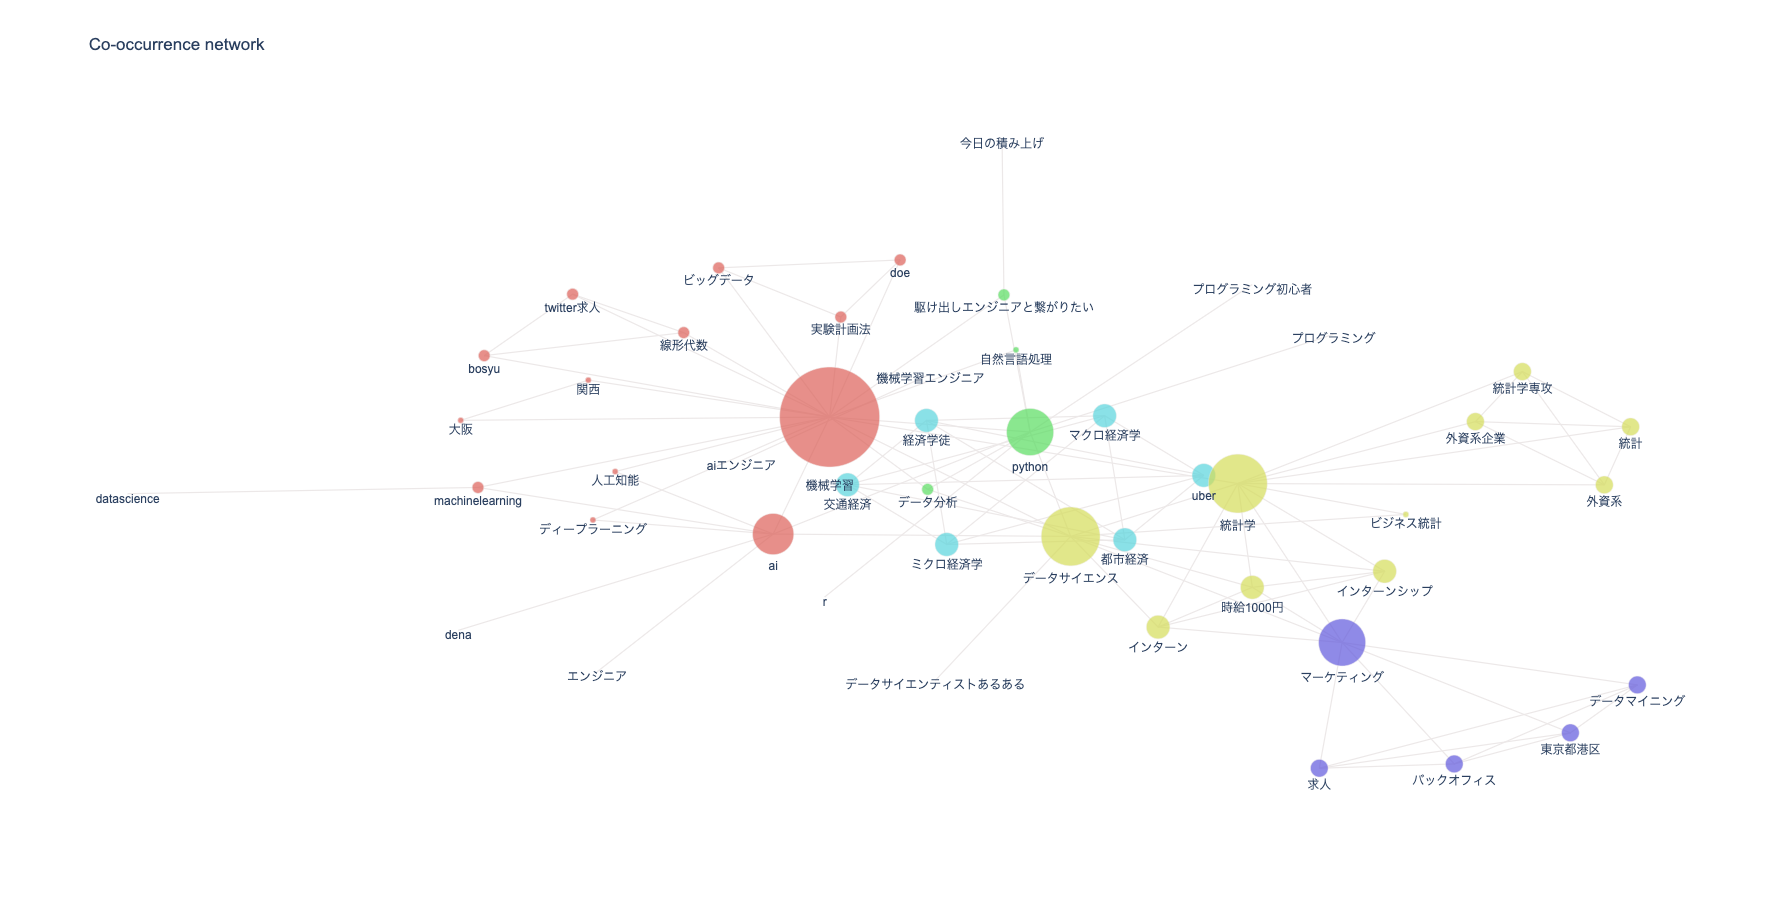

In [19]:
npt.co_network(
    title='Co-occurrence network',
    sizing=100,
    node_size='adjacency_frequency',
    color_palette='hls',
    width=1100,
    height=900,
    save=False
)

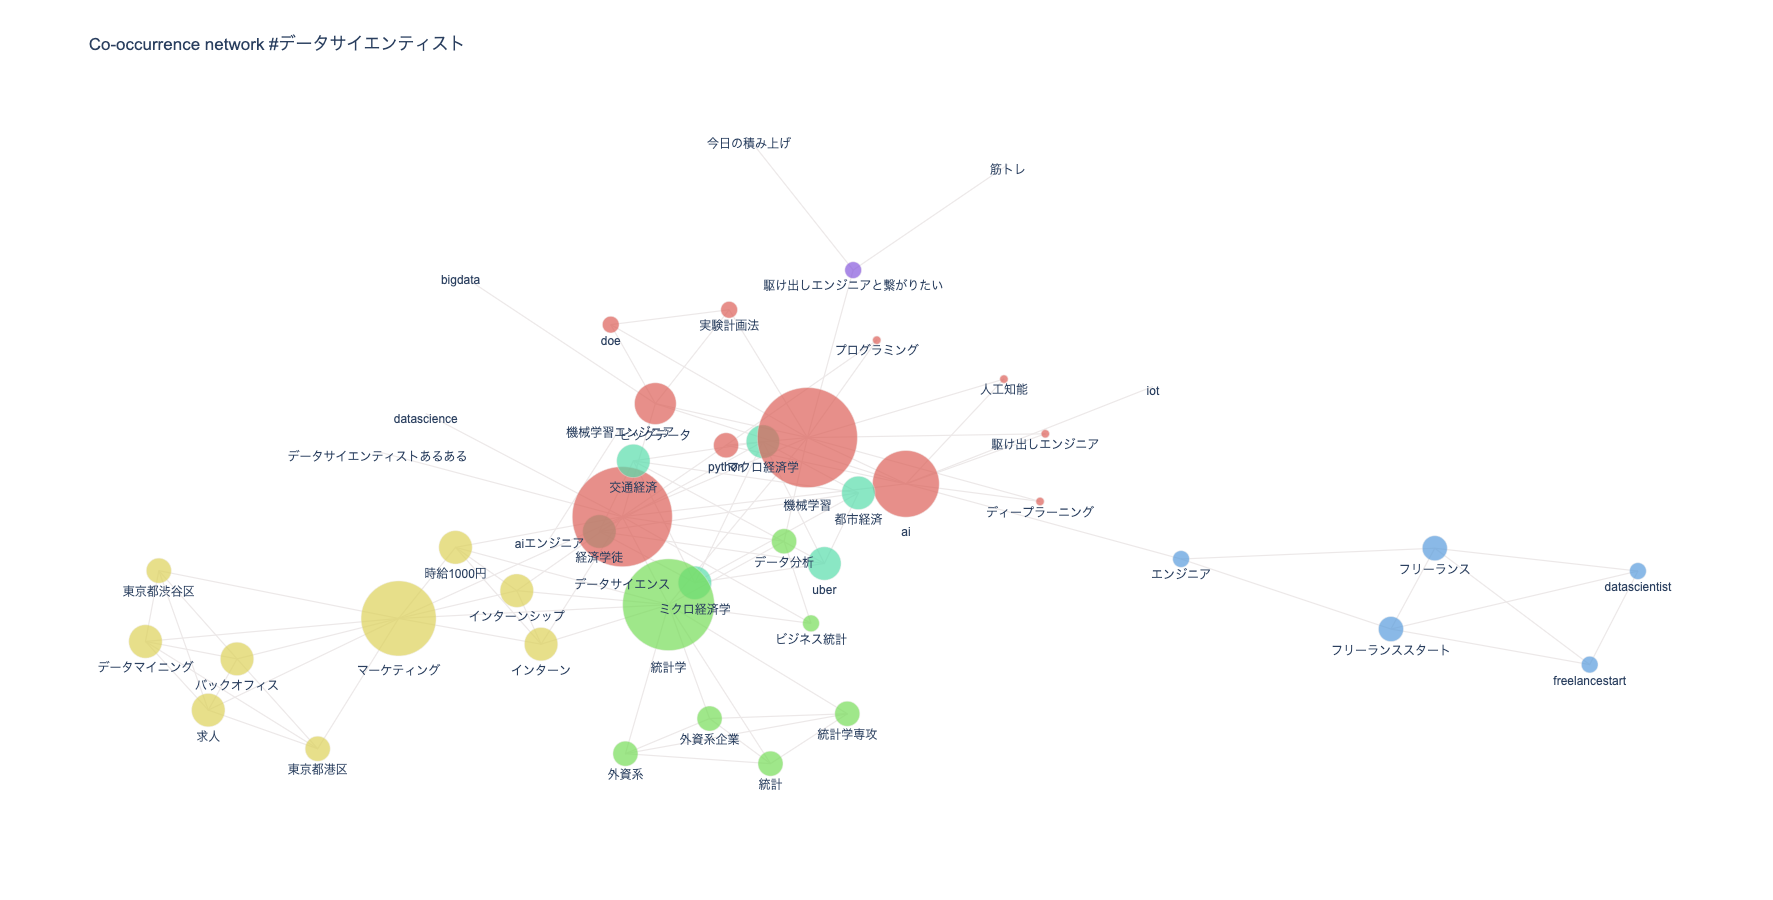

In [20]:
npt_ds.co_network(
    title='Co-occurrence network #データサイエンティスト',
    sizing=100,
    node_size='adjacency_frequency',
    color_palette='hls',
    width=1100,
    height=900,
    save=False
)

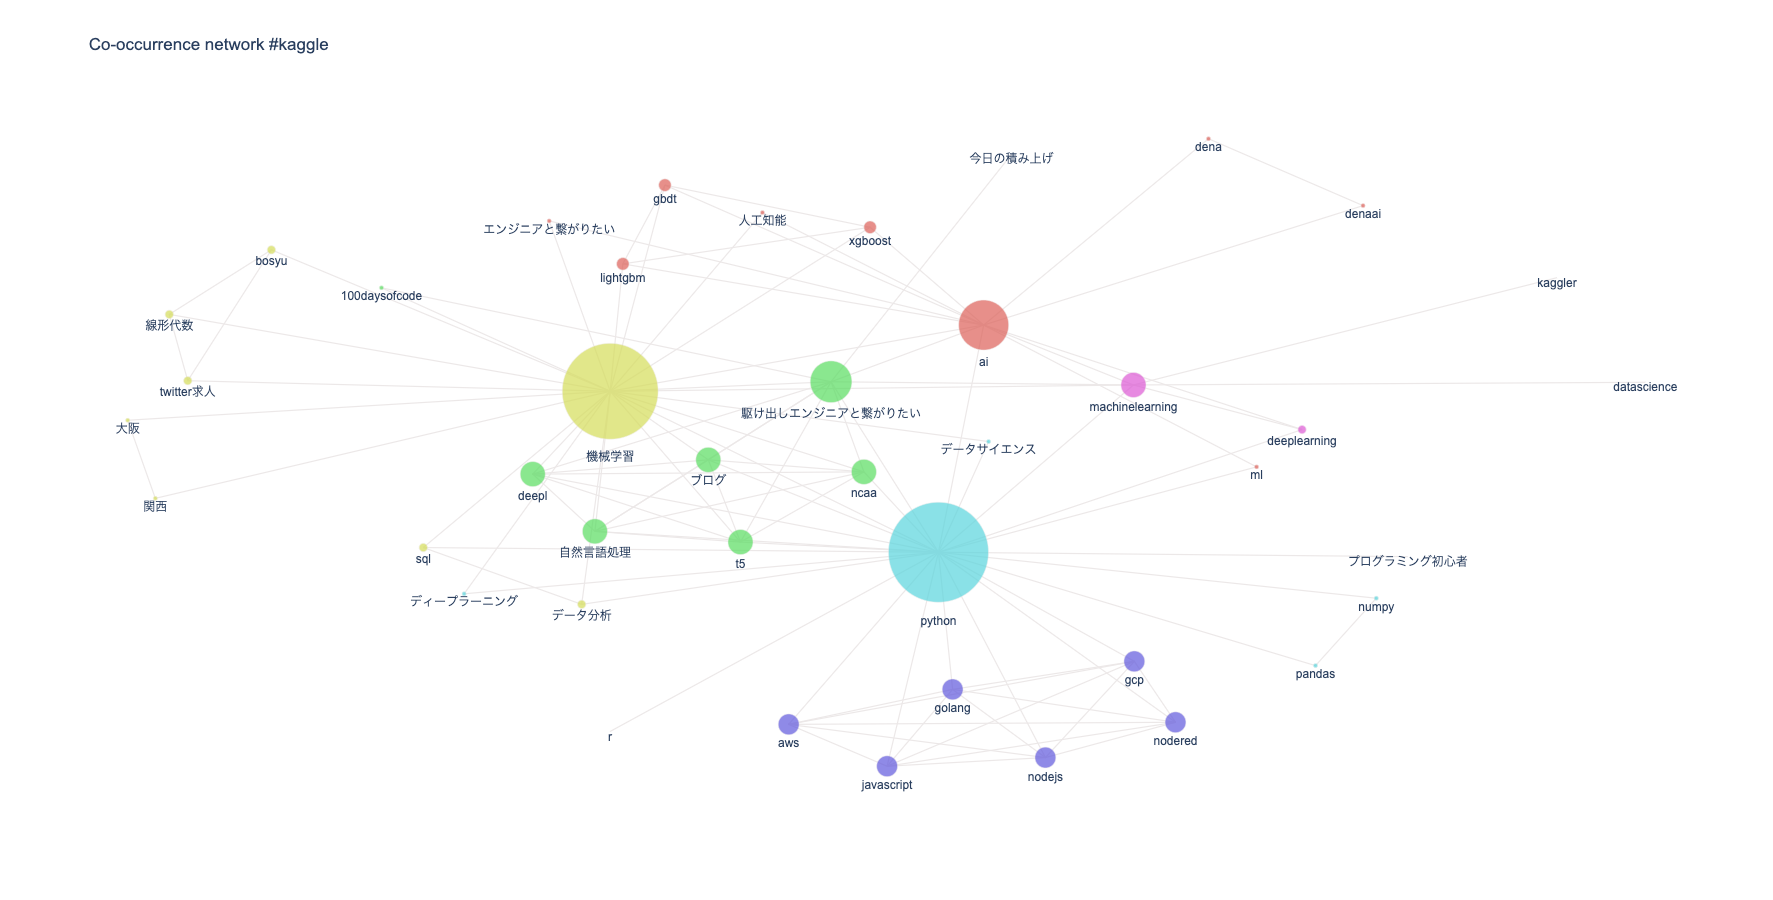

In [21]:
npt_kaggle.co_network(
    title='Co-occurrence network #kaggle',
    sizing=100,
    node_size='adjacency_frequency',
    color_palette='hls',
    width=1100,
    height=900,
    save=False
)

## sunburst

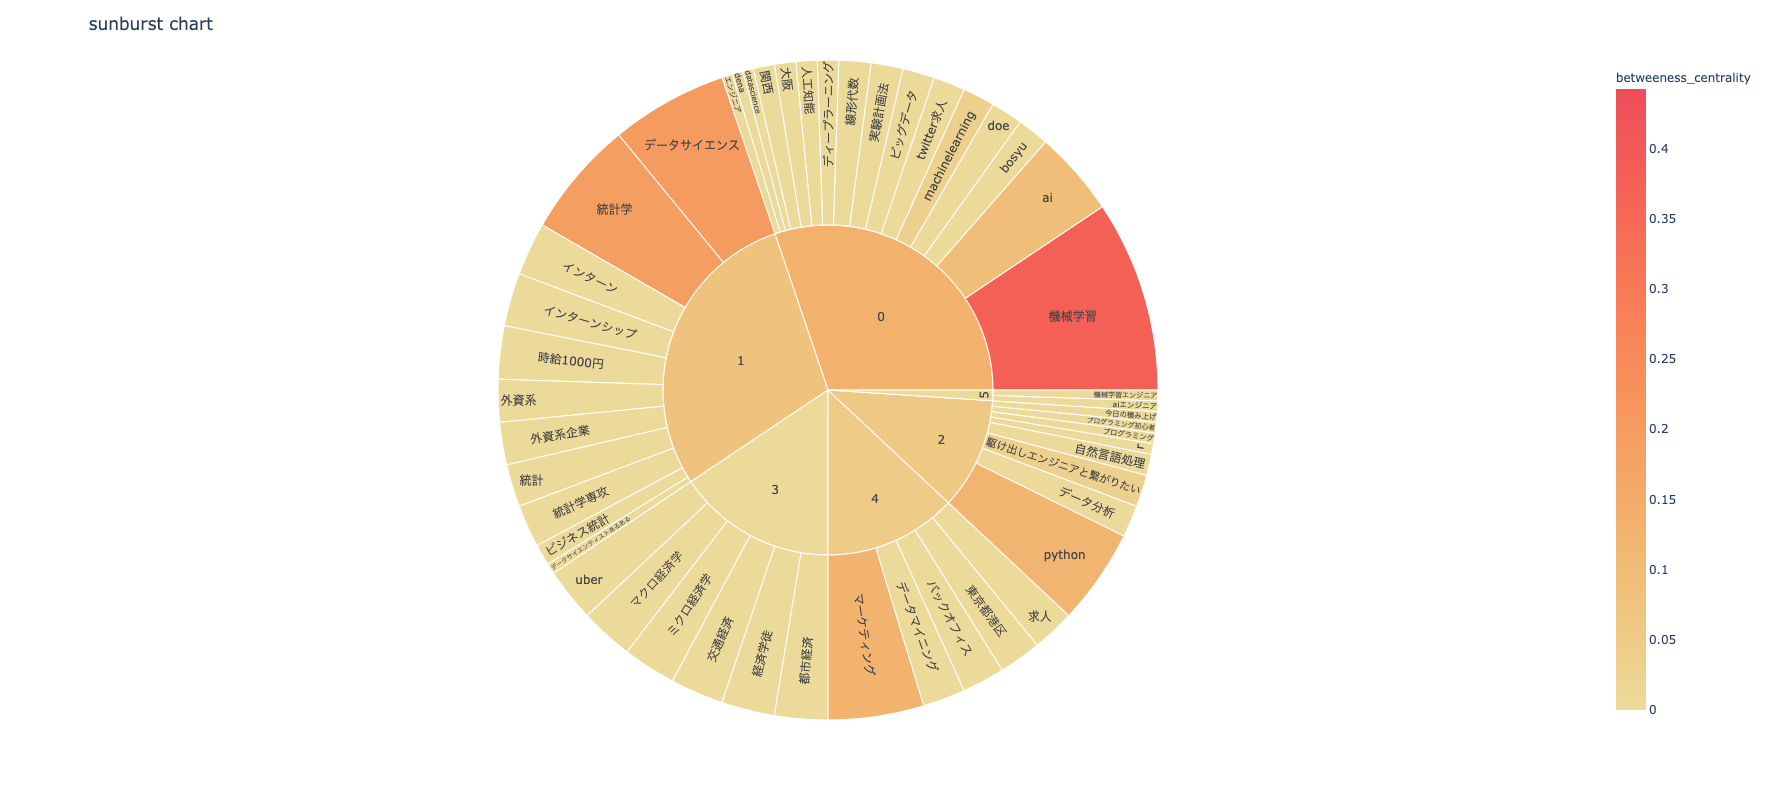

In [22]:
npt.sunburst(
    title='sunburst chart',
    colorscale=True,
    color_continuous_scale='Oryel',
    width=1000,
    height=800,
    save=False
)

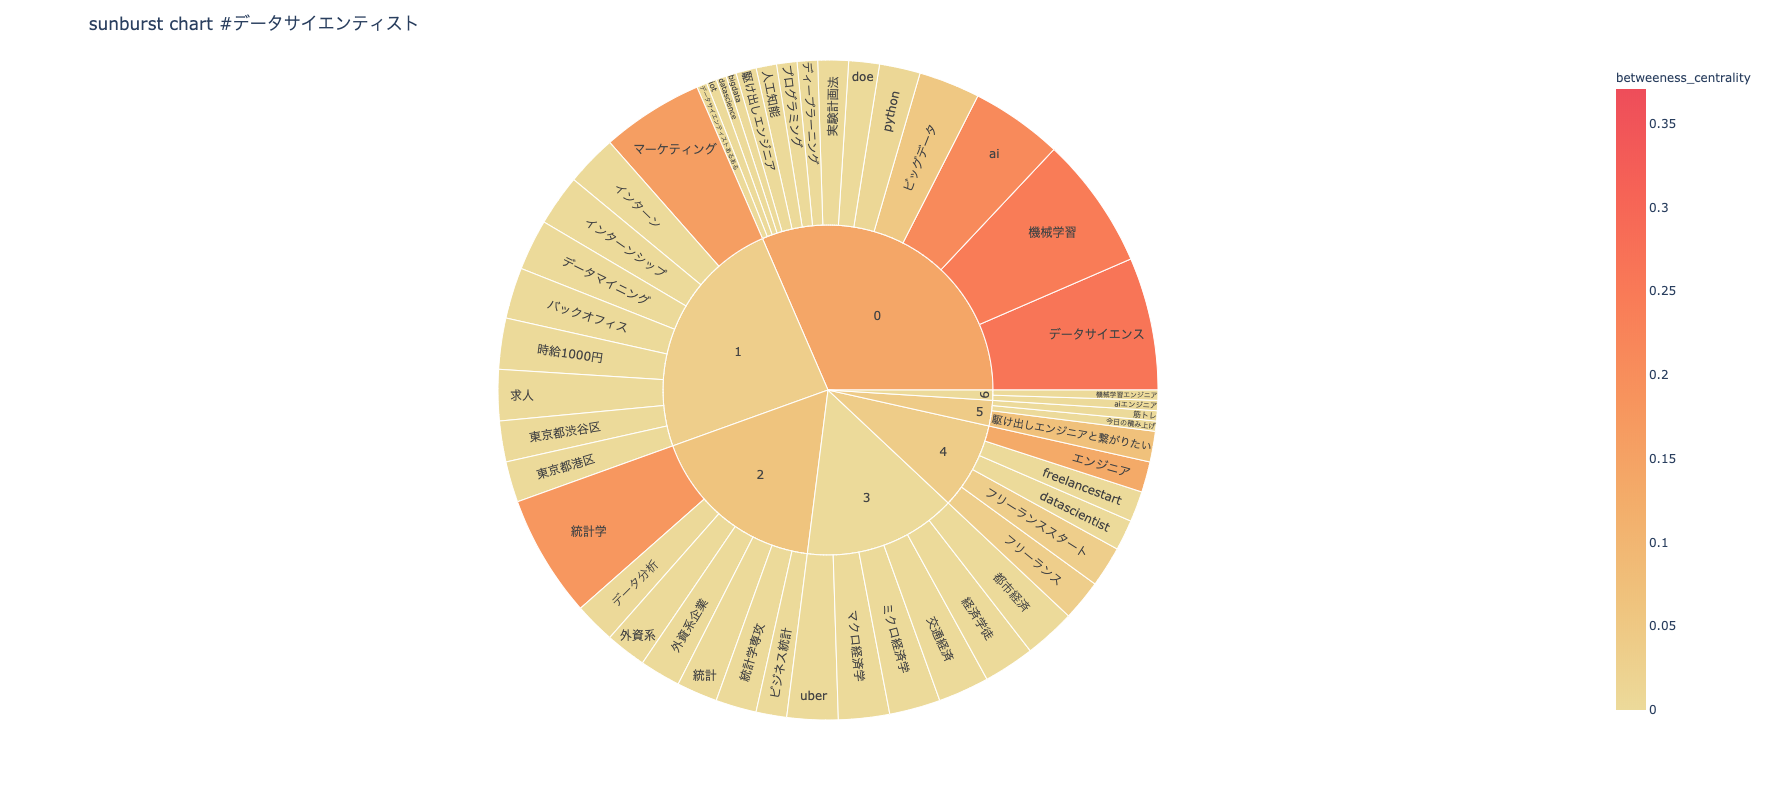

In [23]:
npt_ds.sunburst(
    title='sunburst chart #データサイエンティスト',
    colorscale=True,
    color_continuous_scale='Oryel',
    width=1000,
    height=800,
    save=False
)

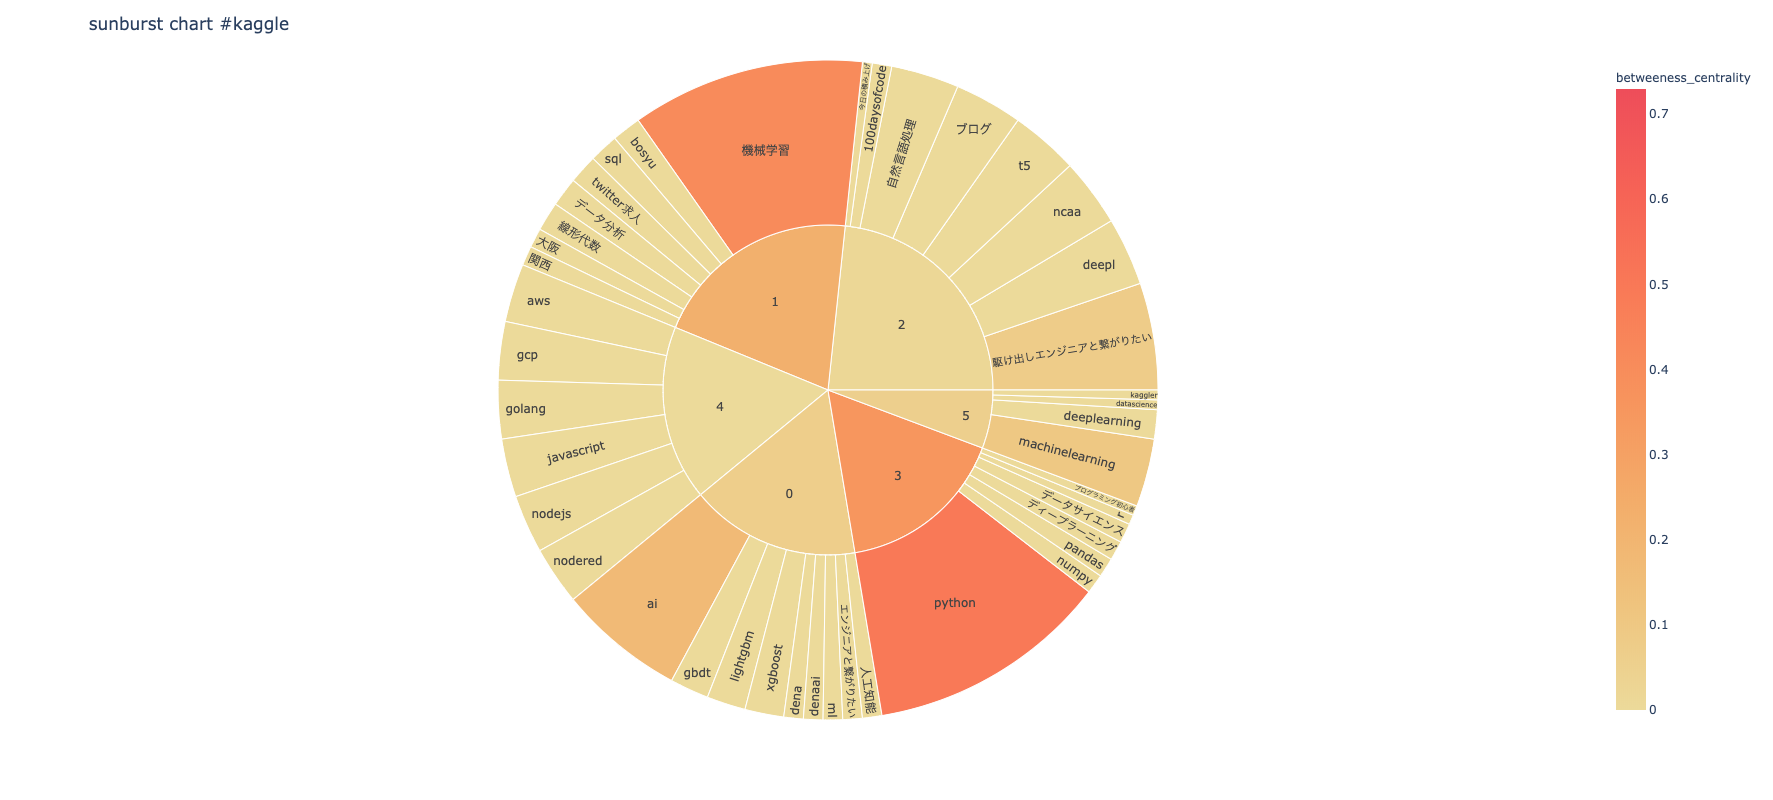

In [24]:
npt_kaggle.sunburst(
    title='sunburst chart #kaggle',
    colorscale=True,
    color_continuous_scale='Oryel',
    width=1000,
    height=800,
    save=False
)

## LDA

In [25]:
# import pyLDAvis
# pyLDAvis.enable_notebook()

In [26]:
npt.ldavis(num_topics=2, passes=2, save=True)

PreparedData(topic_coordinates=           x     y  topics  cluster   Freq
topic                                     
0      0.085 0.000       1        1 55.547
1     -0.085 0.000       2        1 44.453, topic_info=                    Term     Freq    Total Category  logprob  loglift
205               kaggle 1118.000 1118.000  Default   30.000   30.000
0            データサイエンティスト 1254.000 1254.000  Default   29.000   29.000
72       machinelearning  151.000  151.000  Default   28.000   28.000
36                python  224.000  224.000  Default   27.000   27.000
83               マーケティング  185.000  185.000  Default   26.000   26.000
8               データサイエンス  360.000  360.000  Default   25.000   25.000
84               時給1000円  153.000  153.000  Default   24.000   24.000
82              インターンシップ  155.000  155.000  Default   23.000   23.000
81                 インターン  158.000  158.000  Default   22.000   22.000
93                 外資系企業   99.000   99.000  Default   21.000   21.000
92                   外資系   99.000   99.000  Default   20.000   20.000
95                 統計学専攻   98.000   98.000  Default   19.000   19.000
94                    統計  131.000  131.000  Default   18.000   18.000
124               ビッグデータ   81.000   81.000  Default   17.000   17.000
21                  機械学習  447.000  447.000  Default   16.000   16.000
1209   superintelligence   43.000   43.000  Default   15.000   15.000
18                    ai  187.000  187.000  Default   14.000   14.000
412                 経済学徒   57.000   57.000  Default   13.000   13.000
343         deeplearning   25.000   25.000  Default   12.000   12.000
410               ミクロ経済学   57.000   57.000  Default   11.000   11.000
26                   iot   23.000   23.000  Default   10.000   10.000
9               データマイニング   25.000   25.000  Default    9.000    9.000
1197            bragging   19.000   19.000  Default    8.000    8.000
518               ビジネス統計   21.000   21.000  Default    7.000    7.000
371              バックオフィス   22.000   22.000  Default    6.000    6.000
373                   求人   29.000   29.000  Default    5.000    5.000
409               マクロ経済学   58.000   58.000  Default    4.000    4.000
206              titanic   26.000   26.000  Default    3.000    3.000
489                   大阪   20.000   20.000  Default    2.000    2.000
152                   関西   20.000   20.000  Default    1.000    1.000
84               時給1000円  148.139  153.243   Topic1   -3.685    0.554
83               マーケティング  177.831  185.208   Topic1   -3.502    0.547
82              インターンシップ  148.513  155.066   Topic1   -3.682    0.545
81                 インターン  150.362  158.540   Topic1   -3.670    0.535
9               データマイニング   23.902   25.353   Topic1   -5.509    0.529
124               ビッグデータ   75.828   81.049   Topic1   -4.355    0.521
518               ビジネス統計   19.889   21.288   Topic1   -5.693    0.520
211                  doe   12.205   13.106   Topic1   -6.181    0.517
212                実験計画法   12.097   13.123   Topic1   -6.190    0.507
371              バックオフィス   21.144   22.969   Topic1   -5.632    0.505
372                東京都港区   12.071   13.127   Topic1   -6.192    0.504
154      データサイエンティストあるある   11.287   12.312   Topic1   -6.260    0.501
474               東京都渋谷区    7.417    8.225   Topic1   -6.680    0.484
1557        mercariprize   11.830   13.166   Topic1   -6.213    0.481
620              aiエンジニア   16.955   18.935   Topic1   -5.853    0.477
63                  it経営    8.825    9.882   Topic1   -6.506    0.475
373                   求人   26.401   29.658   Topic1   -5.410    0.472
48        freelancestart    7.331    8.239   Topic1   -6.691    0.471
52                  案件相場    5.822    6.598   Topic1   -6.922    0.463
8               データサイエンス  316.468  360.666   Topic1   -2.926    0.457
412                 経済学徒   50.329   57.830   Topic1   -4.765    0.449
522                データ活用    5.022    5.785   Topic1   -7.069    0.447
645            エクスプロラトリー    4.300    4.959   Topic1   -7.225    0.445
399  